In [1]:
import pandas as pd
data=pd.read_csv('GOOG.csv', encoding = 'ISO-8859-1')

In [2]:
data.shape

(3579, 7)

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
1,2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2,2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
3,2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
4,2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400


In [4]:
df =  data.iloc[:,[1,2,3,4,6]]

In [5]:
df.head()

,Open,High,Low,Close,Volume
0,49.676899,51.693783,47.669952,49.845802,44994500
1,50.178635,54.187561,49.925285,53.805050,23005800
2,55.017166,56.373344,54.172661,54.346527,18393200
3,55.260582,55.439419,51.450363,52.096165,15361800
4,52.140873,53.651051,51.604362,52.657513,9257400


In [6]:
closed_df = df.iloc[:,[3]]

In [7]:
normalized_df = df.iloc[:,[0,1,2,4]]

In [8]:
#Z-Score
from scipy.stats import zscore
for col in normalized_df.columns:
    col_zscore = col + '_zscore'
    normalized_df[col_zscore] = zscore(normalized_df[col])
    normalized_df.drop(col, axis=1, inplace=True)

In [9]:
normalized_df.head()

,Open_zscore,High_zscore,Low_zscore,Volume_zscore
0,-1.334917,-1.331516,-1.337548,4.534405
1,-1.333175,-1.322920,-1.329656,1.870729
2,-1.316372,-1.315385,-1.314792,1.311966
3,-1.315527,-1.318604,-1.324319,0.944747
4,-1.326360,-1.324769,-1.323780,0.205270


In [10]:
df_final = pd.concat([normalized_df, closed_df], axis=1)

In [11]:
df_final.shape

(3579, 5)

In [12]:
df_final.head()

,Open_zscore,High_zscore,Low_zscore,Volume_zscore,Close
0,-1.334917,-1.331516,-1.337548,4.534405,49.845802
1,-1.333175,-1.322920,-1.329656,1.870729,53.805050
2,-1.316372,-1.315385,-1.314792,1.311966,54.346527
3,-1.315527,-1.318604,-1.324319,0.944747,52.096165
4,-1.326360,-1.324769,-1.323780,0.205270,52.657513


In [13]:
train_size = int(len(df_final) * 0.70)

In [14]:
X_train_df = df_final.iloc[:train_size, [0,1,2,3]]

In [15]:
y_train_df = df_final.iloc[:train_size, 4]

In [16]:
X_test_df = df_final.iloc[train_size:, [0,1,2,3]]

In [17]:
y_test_df = df_final.iloc[train_size:, 4]

In [18]:
tns_X_train = X_train_df.as_matrix(columns=None)
tns_y_train = y_train_df.as_matrix(columns=None)
tns_X_test = X_test_df.as_matrix(columns=None)
tns_y_test = y_test_df.as_matrix(columns=None)
print(tns_X_train.shape, tns_y_train.shape, tns_X_test.shape, tns_y_test.shape)

(2505, 4) (2505,) (1074, 4) (1074,)


In [21]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense
from keras.layers import Dropout

In [23]:
# Define ModelCheckpoint outside the loop
checkpointer = ModelCheckpoint(filepath="tns/weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    tns_model = Sequential()
    # Build network
    tns_model.add(Dense(130, input_dim = tns_X_train.shape[1], activation='relu')) # Hidden 1
    tns_model.add(Dropout(0.10))
    tns_model.add(Dense(80, activation='relu')) # Hidden 2
    tns_model.add(Dropout(0.10))
    tns_model.add(Dense(30, activation='relu')) # Hidden 3
    tns_model.add(Dense(1)) # Output

    tns_model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    tns_model.fit(tns_X_train, tns_y_train, validation_data = (tns_X_test, tns_y_test), callbacks=[monitor, checkpointer], 
                  verbose=2,epochs=100)

0
Train on 2505 samples, validate on 1074 samples
Epoch 1/100
 - 1s - loss: 83183.8629 - val_loss: 610925.5353
Epoch 2/100
 - 0s - loss: 34234.2245 - val_loss: 85989.5073
Epoch 3/100
 - 0s - loss: 7076.1990 - val_loss: 17838.5997
Epoch 4/100
 - 0s - loss: 4919.1768 - val_loss: 6202.3034
Epoch 5/100
 - 0s - loss: 3669.2782 - val_loss: 3316.5389
Epoch 6/100
 - 0s - loss: 2437.6665 - val_loss: 3051.2481
Epoch 7/100
 - 0s - loss: 1541.7600 - val_loss: 4087.8557
Epoch 8/100
 - 0s - loss: 1017.6391 - val_loss: 1484.7910
Epoch 9/100
 - 0s - loss: 686.9606 - val_loss: 1193.7690
Epoch 10/100
 - 0s - loss: 513.5042 - val_loss: 443.5584
Epoch 11/100
 - 0s - loss: 408.2493 - val_loss: 174.4247
Epoch 12/100
 - 0s - loss: 371.8113 - val_loss: 214.9898
Epoch 13/100
 - 0s - loss: 330.7835 - val_loss: 134.7248
Epoch 14/100
 - 0s - loss: 325.8108 - val_loss: 588.2721
Epoch 15/100
 - 0s - loss: 338.0459 - val_loss: 154.9625
Epoch 16/100
 - 0s - loss: 310.2098 - val_loss: 81.8202
Epoch 17/100
 - 0s - loss

# Scores for Fully-Connected Neural Networks

In [24]:
tns_model.load_weights('tns/weights.hdf5')
tns_pred = tns_model.predict(tns_X_test)
score = np.sqrt(metrics.mean_squared_error(tns_y_test, tns_pred)) 

print("RMSE: {}".format(score))
print("R2 score",metrics.r2_score(tns_y_test, tns_pred))
print("MSE:: ", metrics.mean_squared_error(tns_y_test, tns_pred))

RMSE: 6.9140368128355325
R2 score 0.9989285508656255
MSE::  47.80390504924493


In [25]:
# Regression chart.
import matplotlib.pyplot as plt
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

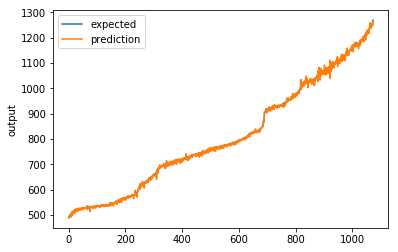

In [26]:
# Plot the chart
chart_regression(tns_pred.flatten(), tns_y_test)

In [27]:
lstm_train_df = df_final.iloc[:train_size]
lstm_train_df.shape

(2505, 5)

In [28]:
lstm_test_df = df_final.iloc[train_size+1:]
lstm_test_df.shape

(1073, 5)

In [29]:
list_X_train = lstm_train_df.as_matrix(columns=None)

In [30]:
list_X_test = lstm_test_df.as_matrix(columns=None)

In [31]:
import numpy as np

def to_sequences(SEQUENCE_SIZE, data):
    lstm_X = []
    lstm_y = []

    for i in range(len(data)-SEQUENCE_SIZE-1):
        #print(i)
        window = data[i:(i+SEQUENCE_SIZE)]
        
        after_window = data[i+SEQUENCE_SIZE, 4]
        
        #window = [[x] for x in window]
                
        lstm_X.append(window)
        
        lstm_y.append(after_window)
        
    return np.array(lstm_X),np.array(lstm_y)

In [32]:
SEQUENCE_SIZE = 7

lstm_X_train, lstm_y_train = to_sequences(SEQUENCE_SIZE, list_X_train)

print("Shape of x_train: {}".format(lstm_X_train.shape))
print("Shape of y_train: {}".format(lstm_y_train.shape))

Shape of x_train: (2497, 7, 5)
Shape of y_train: (2497,)


In [33]:
lstm_X_test, lstm_y_test = to_sequences(SEQUENCE_SIZE, list_X_test)

print("Shape of x_test: {}".format(lstm_X_test.shape))
print("Shape of y_test: {}".format(lstm_y_test.shape))

Shape of x_test: (1065, 7, 5)
Shape of y_test: (1065,)


In [34]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
import numpy as np

checkpointer = ModelCheckpoint(filepath="lstm/best_weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    
    print(i)
    print('Build model...')
    
    lstm_model = Sequential()

    lstm_model.add(LSTM(256, activation='relu', dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE,5)))
    lstm_model.add(Dropout(0.10))
    lstm_model.add(Dense(150, activation='relu'))
    lstm_model.add(Dropout(0.10))
    lstm_model.add(Dense(100, activation='relu'))
    lstm_model.add(Dropout(0.10))
    lstm_model.add(Dense(50, activation='relu'))
    lstm_model.add(Dense(1))

    lstm_model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    print('Train...')

    lstm_model.fit(lstm_X_train, lstm_y_train, validation_data=(lstm_X_test, lstm_y_test), 
                   callbacks=[monitor, checkpointer], verbose=2, epochs=100)

0
Build model...
Train...
Train on 2497 samples, validate on 1065 samples
Epoch 1/100
 - 4s - loss: 16855.9176 - val_loss: 24470.3983
Epoch 2/100
 - 2s - loss: 3682.1919 - val_loss: 34699.3689
Epoch 3/100
 - 2s - loss: 1338.7850 - val_loss: 44356.1936
Epoch 4/100
 - 2s - loss: 783.8015 - val_loss: 18369.5731
Epoch 5/100
 - 2s - loss: 946.9488 - val_loss: 42566.5737
Epoch 6/100
 - 2s - loss: 718.5915 - val_loss: 31824.5401
Epoch 7/100
 - 2s - loss: 689.8896 - val_loss: 45311.4591
Epoch 8/100
 - 3s - loss: 3407.4161 - val_loss: 35124.9206
Epoch 9/100
 - 3s - loss: 930.6898 - val_loss: 35984.5893
Epoch 00009: early stopping
1
Build model...
Train...
Train on 2497 samples, validate on 1065 samples
Epoch 1/100
 - 5s - loss: 14561.6128 - val_loss: 9270.1833
Epoch 2/100
 - 2s - loss: 1987.7525 - val_loss: 50130.3094
Epoch 3/100
 - 2s - loss: 1367.8407 - val_loss: 37800.6293
Epoch 4/100
 - 3s - loss: 915.2164 - val_loss: 36833.0574
Epoch 5/100
 - 3s - loss: 987.4062 - val_loss: 32370.6890
Epoc

# Scores for LSTM

In [35]:
lstm_model.load_weights('lstm/best_weights.hdf5')

lstm_pred = lstm_model.predict(lstm_X_test)

score = np.sqrt(metrics.mean_squared_error(lstm_y_test, lstm_pred)) 

print("RMSE: {}".format(score))
print("R2 score",metrics.r2_score(lstm_y_test, lstm_pred))
print("MSE:: ", metrics.mean_squared_error(lstm_y_test, lstm_pred))

RMSE: 79.35479480280888
R2 score 0.8584312792137132
MSE::  6297.183458195903


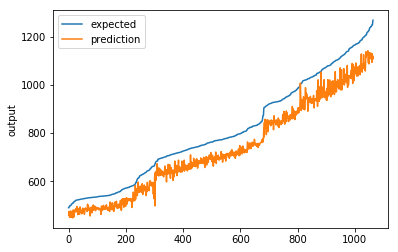

In [36]:
# Plot the chart
chart_regression(lstm_pred.flatten(), lstm_y_test)

In [37]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout
from keras import regularizers

In [38]:
cnn_X_train = lstm_X_train.reshape(lstm_X_train.shape[0], 1, SEQUENCE_SIZE, 5)
cnn_X_test = lstm_X_test.reshape(lstm_X_test.shape[0], 1, SEQUENCE_SIZE, 5)

In [39]:
input_shape=(1, SEQUENCE_SIZE, 5)

In [40]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),activation='relu',input_shape=input_shape, padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1),activation='relu',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Conv2D(128,kernel_size=(3, 3), strides=(1, 1),activation='relu',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Conv2D(256,kernel_size=(3, 3), strides=(1, 1),activation='relu',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(500, activation='relu'))
cnn_model.add(Dense(1))
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 7, 32)          1472      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 4, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 2, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 2, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 1, 256)         295168    
__________

In [41]:
checkpointer = ModelCheckpoint(filepath="cnn/weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)   
    cnn_model.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=2, verbose=1, mode='auto')
    cnn_model.fit(cnn_X_train, lstm_y_train, batch_size=128, validation_data=(cnn_X_test, lstm_y_test), callbacks=[monitor, checkpointer], 
                  verbose=2, epochs=100)

0
Train on 2497 samples, validate on 1065 samples
Epoch 1/100
 - 4s - loss: 38414.9553 - val_loss: 49731.2681
Epoch 2/100
 - 2s - loss: 2774.9157 - val_loss: 11080.7711
Epoch 3/100
 - 2s - loss: 401.4209 - val_loss: 446.5809
Epoch 4/100
 - 2s - loss: 121.5350 - val_loss: 558.8483
Epoch 5/100
 - 2s - loss: 82.8827 - val_loss: 496.3804
Epoch 00005: early stopping
1
Train on 2497 samples, validate on 1065 samples
Epoch 1/100
 - 4s - loss: 2159.0152 - val_loss: 3118.3895
Epoch 2/100
 - 2s - loss: 274.9429 - val_loss: 474.0067
Epoch 3/100
 - 2s - loss: 95.7637 - val_loss: 484.7494
Epoch 4/100
 - 2s - loss: 71.9449 - val_loss: 438.6810
Epoch 5/100
 - 2s - loss: 70.2266 - val_loss: 409.6927
Epoch 6/100
 - 2s - loss: 66.9746 - val_loss: 393.5807
Epoch 7/100
 - 2s - loss: 68.7180 - val_loss: 546.8225
Epoch 8/100
 - 2s - loss: 69.1392 - val_loss: 381.2065
Epoch 9/100
 - 2s - loss: 62.9775 - val_loss: 364.9799
Epoch 10/100
 - 2s - loss: 60.3694 - val_loss: 361.1798
Epoch 11/100
 - 2s - loss: 63.2

# Scores for CNN

In [42]:
cnn_model.load_weights('cnn/weights.hdf5')

cnn_pred = cnn_model.predict(cnn_X_test)

score = np.sqrt(metrics.mean_squared_error(lstm_y_test, cnn_pred)) 

print("RMSE: {}".format(score))
print("R2 score",metrics.r2_score(lstm_y_test, cnn_pred))
print("MSE:: ", metrics.mean_squared_error(lstm_y_test, cnn_pred))

RMSE: 15.184886792838228
R2 score 0.9948162496364237
MSE::  230.58078691131286
